# **Milestone 1**

Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/Datasets

ProductA.csv  ProductA_fb_impressions.csv  ProductA_google_clicks.csv


Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Uploading Dataset

In [4]:
# Load the datasets
df1 = pd.read_csv('/content/drive/MyDrive/Datasets/ProductA.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Datasets/ProductA_fb_impressions.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Datasets/ProductA_google_clicks.csv')


Printing Head for each dataset

In [5]:
# Display the first 5 rows of each dataset
print("Sales Data:")
print(df1.head())

print("\nFacebook Impressions Data:")
print(df2.head())

print("\nGoogle Clicks Data:")
print(df3.head())

# Display the number of rows and columns in each dataset
print(f"\nSales Data: {df1.shape[0]} rows and {df1.shape[1]} columns")
print(f"Facebook Impressions Data: {df2.shape[0]} rows and {df2.shape[1]} columns")
print(f"Google Clicks Data: {df3.shape[0]} rows and {df3.shape[1]} columns")

Sales Data:
   Day Index  Quantity
0  12/1/2021        14
1  12/2/2021        10
2  12/3/2021        13
3  12/4/2021        22
4  12/5/2021        33

Facebook Impressions Data:
   Day Index  Impressions
0  12/1/2021          620
1  12/2/2021          890
2  12/3/2021          851
3  12/4/2021          881
4  12/5/2021          678

Google Clicks Data:
   Day Index  Clicks
0  12/1/2021     445
1  12/2/2021     433
2  12/3/2021     424
3  12/4/2021     427
4  12/5/2021     451

Sales Data: 212 rows and 2 columns
Facebook Impressions Data: 212 rows and 2 columns
Google Clicks Data: 212 rows and 2 columns


Merging Datasets

In [6]:
# merging datasets
merged_df = df1.merge(df2,how="left", on='Day Index').merge(df3,how='left', on='Day Index')

cleaned_df = merged_df.dropna()

cleaned_df.to_csv('merged_file.csv', index=False)

print(cleaned_df)

     Day Index  Quantity  Impressions  Clicks
0    12/1/2021        14          620     445
1    12/2/2021        10          890     433
2    12/3/2021        13          851     424
3    12/4/2021        22          881     427
4    12/5/2021        33          678     451
..         ...       ...          ...     ...
207  6/26/2022        13         1218     114
208  6/27/2022        16         1311     106
209  6/28/2022        13          885     109
210  6/29/2022        16         1000      60
211  6/30/2022         8          875      65

[212 rows x 4 columns]


## **EDA**

Basic Visualization




*   Histogram plot



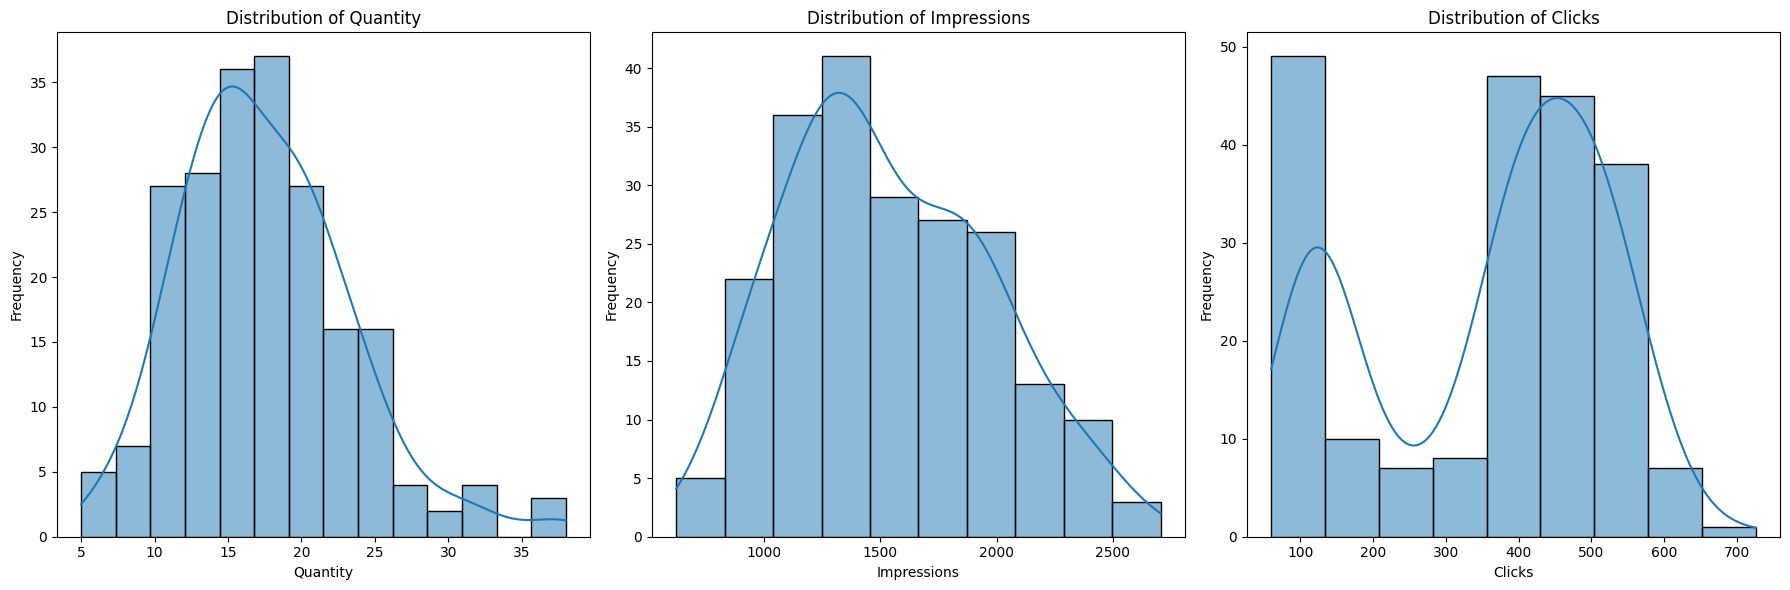

In [7]:
df = pd.read_csv('merged_file.csv')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# List of columns to plot
columns = ['Quantity', 'Impressions', 'Clicks']

for i, col in enumerate(columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


*   Quantity Through Times

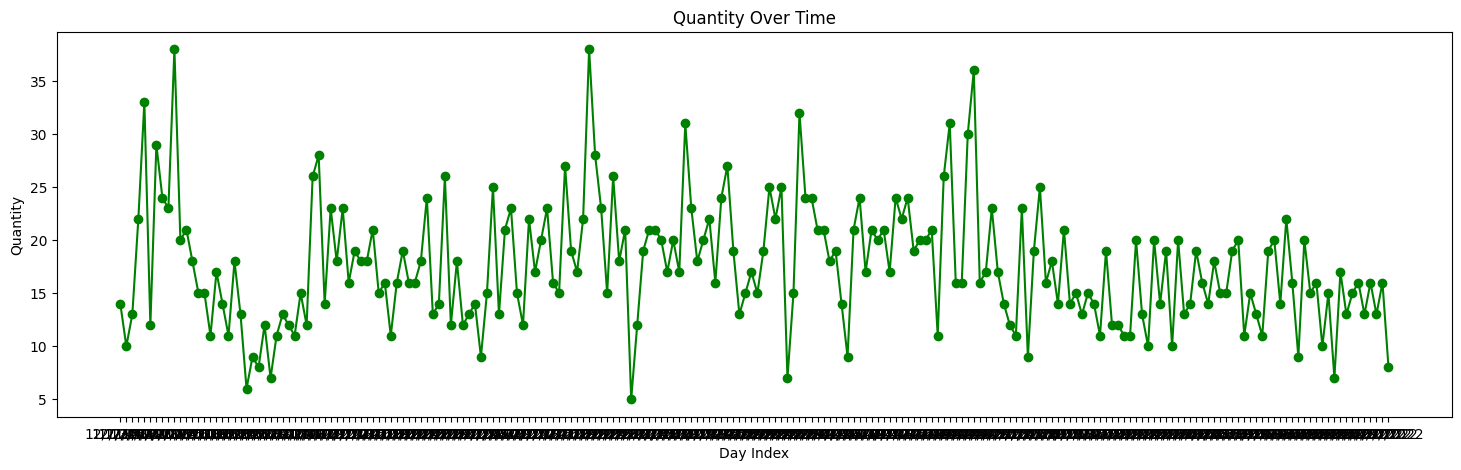

In [8]:
# Plot Quantity over time (Day Index)
plt.figure(figsize=(18, 5))
plt.plot(df['Day Index'], df['Quantity'], color='green', marker='o', linestyle='-')
plt.title('Quantity Over Time')
plt.xlabel('Day Index')
plt.ylabel('Quantity')
plt.grid(False)
plt.show()



*   Impressions through time



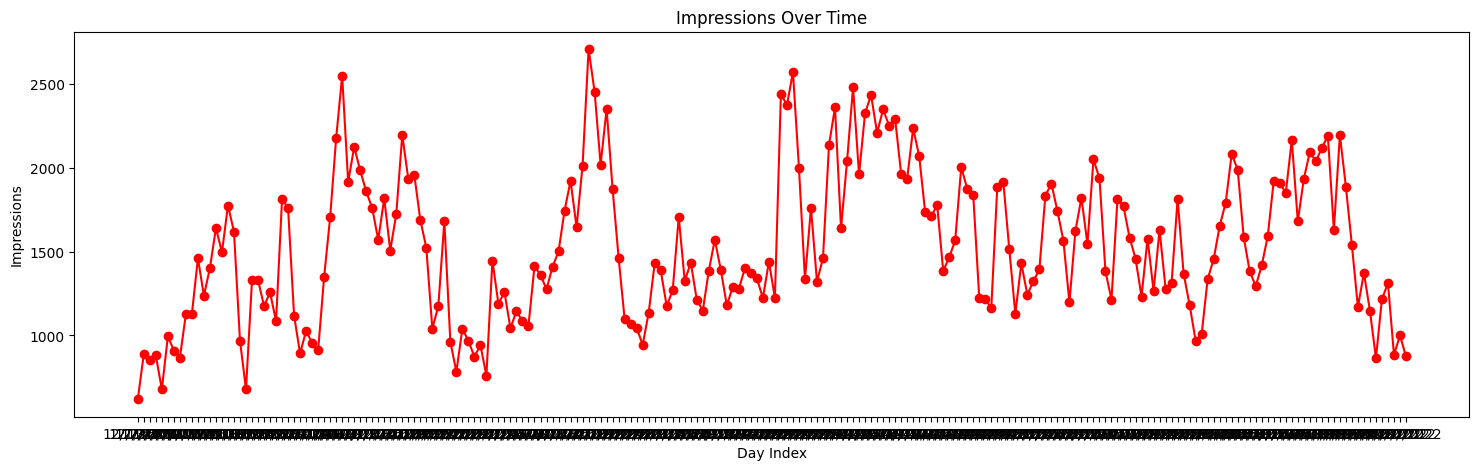

In [9]:
# Plot Impressions over time (Day Index)
plt.figure(figsize=(18, 5))
plt.plot(df['Day Index'], df['Impressions'], color='red', marker='o', linestyle='-')
plt.title('Impressions Over Time')
plt.xlabel('Day Index')
plt.ylabel('Impressions')
plt.grid(False)
plt.show()



*   Clicks Over time



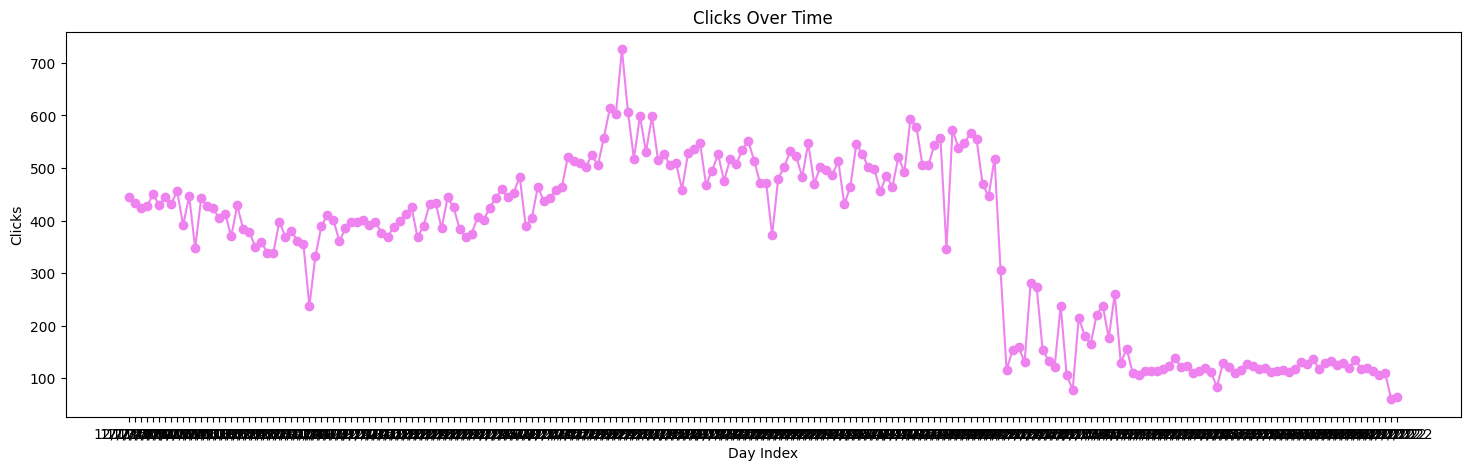

In [10]:
# Plot Clicks over time (Day Index)
plt.figure(figsize=(18, 5))
plt.plot(df['Day Index'], df['Clicks'], color='violet', marker='o', linestyle='-')
plt.title('Clicks Over Time')
plt.xlabel('Day Index')
plt.ylabel('Clicks')
plt.grid(False)
plt.show()

Display Missing Values

In [11]:
data = pd.read_csv('merged_file.csv')

missing_values = data.isnull().sum()

print(missing_values)

Day Index      0
Quantity       0
Impressions    0
Clicks         0
dtype: int64




*   No missing value present



Ploting outliers

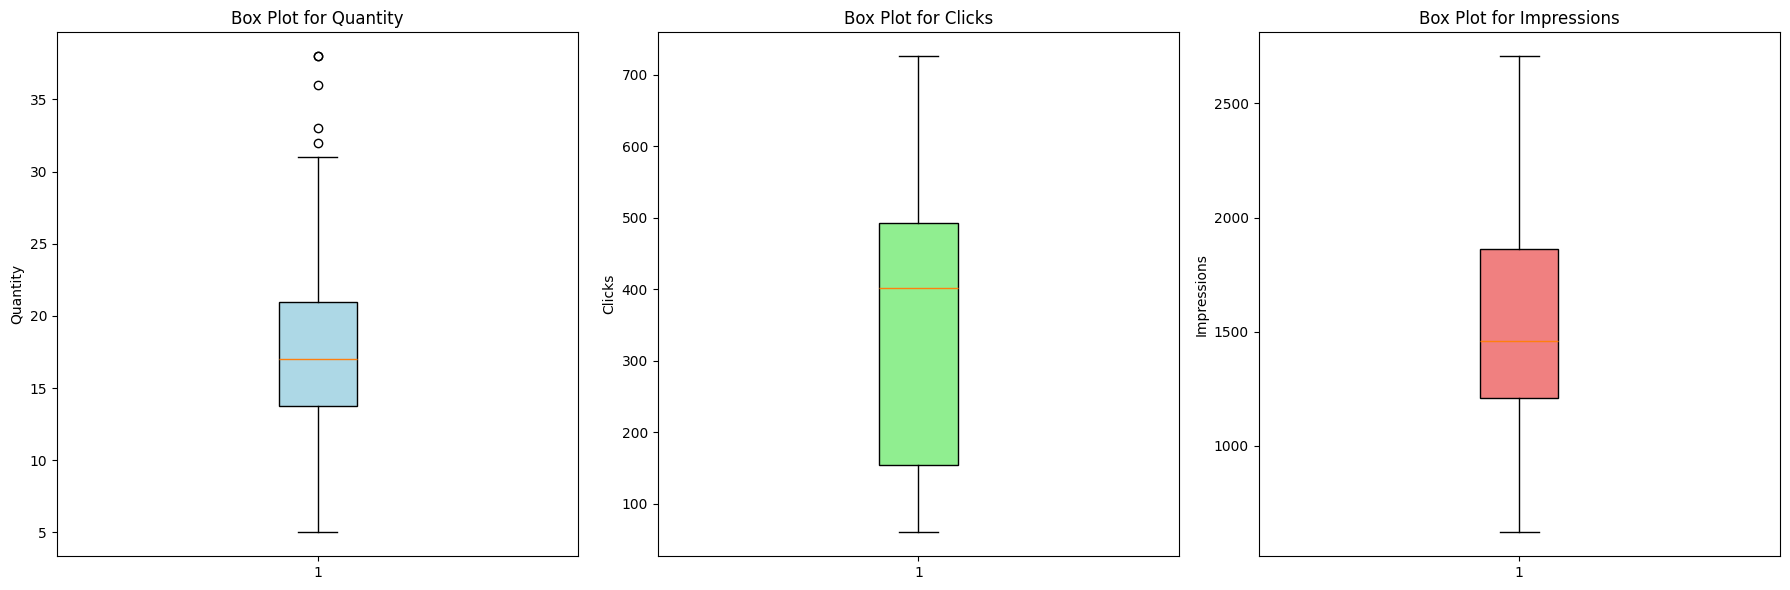

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

colors = ['lightblue', 'lightgreen', 'lightcoral']

# Box plot for Quantity
box1 = axes[0].boxplot(data['Quantity'], patch_artist=True)
axes[0].set_title('Box Plot for Quantity')
axes[0].set_ylabel('Quantity')
for patch in box1['boxes']:
    patch.set_facecolor(colors[0])

# Box plot for Clicks
box2 = axes[1].boxplot(data['Clicks'], patch_artist=True)
axes[1].set_title('Box Plot for Clicks')
axes[1].set_ylabel('Clicks')
for patch in box2['boxes']:
    patch.set_facecolor(colors[1])

# Box plot for Impressions
box3 = axes[2].boxplot(data['Impressions'], patch_artist=True)
axes[2].set_title('Box Plot for Impressions')
axes[2].set_ylabel('Impressions')
for patch in box3['boxes']:
    patch.set_facecolor(colors[2])

plt.tight_layout()
plt.show()




*   Clearly visible outlier present in Quantity



By the Interquartile Range (IQR) method, find outliers below the 25th percentile and above the 75th percentile.

In [13]:
import pandas as pd

def find_outliers_IQR(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    outliers = column[(column < (q1 - 1.5 * IQR)) | (column > (q3 + 1.5 * IQR))]
    return outliers

# Print the number of outliers for each column
print(f"Quantity:\t {len(find_outliers_IQR(data['Quantity']))}")
print(f"Clicks:\t\t {len(find_outliers_IQR(data['Clicks']))}")
print(f"Impressions:\t {len(find_outliers_IQR(data['Impressions']))}")


Quantity:	 5
Clicks:		 0
Impressions:	 0


There are 5 outlier in Quantity



*   Quantity outliers are printing



In [14]:
print(f"Quantity:\n{find_outliers_IQR(data['Quantity'])}")

Quantity:
4      33
9      38
78     38
113    32
142    36
Name: Quantity, dtype: int64


**Replacing Outliers with 98th percentile**

print the 98 percentile value

In [15]:
percentile_98_value = data["Quantity"].quantile(0.98)
print(percentile_98_value)

31.78


In [16]:
def calculate_outliers_98th_percentile(series):
    q1, q3 = series.quantile([0.25, 0.75])
    IQR = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * IQR, q3 + 1.5 * IQR
    percentile_95_value = series.quantile(0.98)
    return series.apply(lambda x: percentile_98_value if x < lower_bound or x > upper_bound else x)

In [17]:
data['updated_Quantity'] = calculate_outliers_98th_percentile(data['Quantity'])
data['updated_Quantity'] = data['updated_Quantity'].astype(int)

Printing the merge data set after updated outliers

In [18]:
data.head()

,Day Index,Quantity,Impressions,Clicks,updated_Quantity
0,12/1/2021,14,620,445,14
1,12/2/2021,10,890,433,10
2,12/3/2021,13,851,424,13
3,12/4/2021,22,881,427,22
4,12/5/2021,33,678,451,31


Ploting again after updated outlier

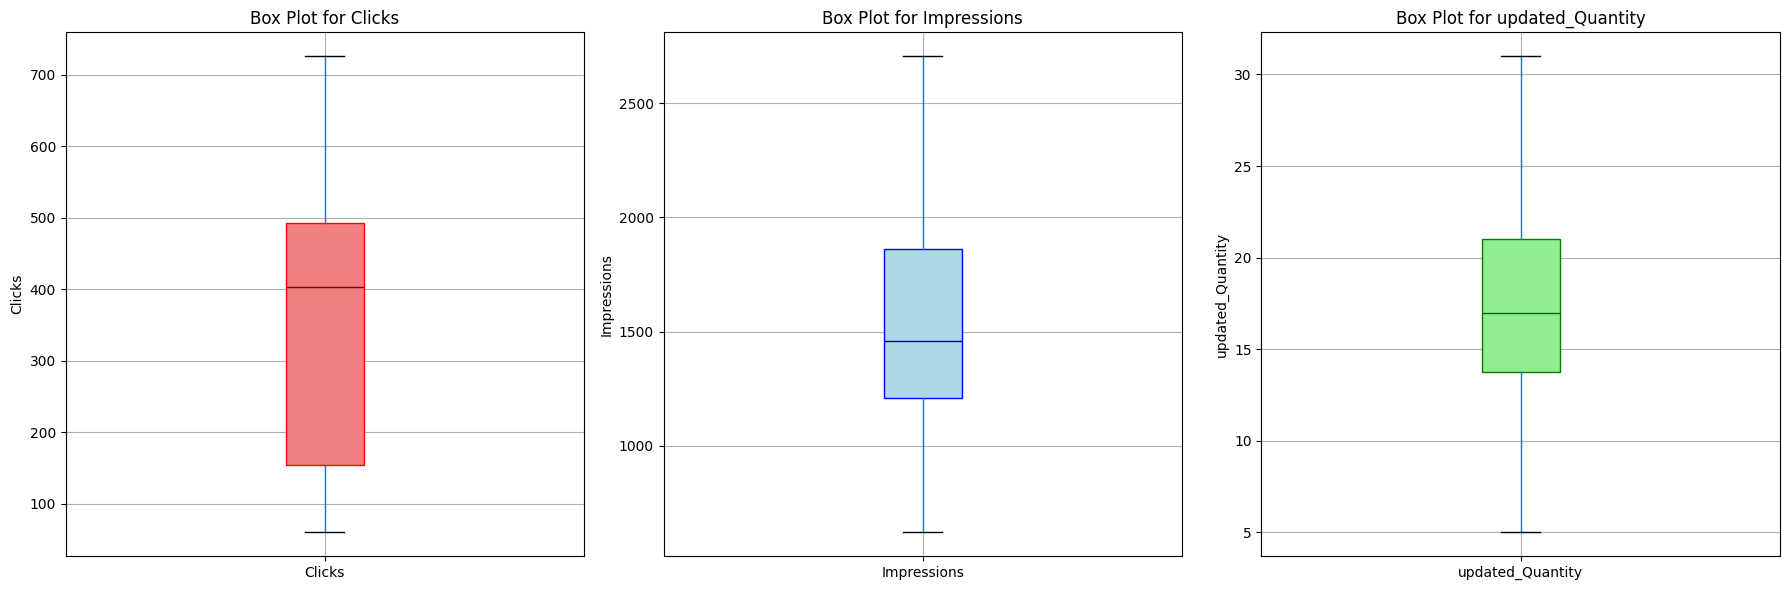

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

data.boxplot(column='Clicks', ax=axes[0],
             flierprops=dict(markerfacecolor='orange', marker='o'),
             medianprops=dict(color='darkred'),
             patch_artist=True,
             boxprops=dict(facecolor='lightcoral', color='red'))
axes[0].set_title('Box Plot for Clicks')
axes[0].set_ylabel('Clicks')

data.boxplot(column='Impressions', ax=axes[1],
             flierprops=dict(markerfacecolor='green', marker='o'),
             medianprops=dict(color='darkblue'),
             patch_artist=True,
             boxprops=dict(facecolor='lightblue', color='blue'))
axes[1].set_title('Box Plot for Impressions')
axes[1].set_ylabel('Impressions')

data.boxplot(column='updated_Quantity', ax=axes[2],
             flierprops=dict(markerfacecolor='yellow', marker='o'),
             medianprops=dict(color='darkgreen'),
             patch_artist=True,
             boxprops=dict(facecolor='lightgreen', color='green'))
axes[2].set_title('Box Plot for updated_Quantity')
axes[2].set_ylabel('updated_Quantity')

plt.tight_layout()
plt.show()




*   The above boxplot shows that updated_quantity doesn't contain any values with outliers.



## **Feature Engineering**

In [20]:
import holidays

# Ensure 'Day Index' is in datetime format
data['Day Index'] = pd.to_datetime(data['Day Index'], errors='coerce')

# Day of the month
data['Day of the Month'] = data['Day Index'].dt.day

# Extracting month and day of the week
data['month'] = data['Day Index'].dt.month_name()
data['day_of_week'] = data['Day Index'].dt.day_name()

data['YearMonth'] = data['Day Index'].dt.to_period('M')

# Creating binary columns for months
months = data['month'].unique()
for month in months:
    data[month] = (data['month'] == month).astype(int)

# Creating binary columns for days of the week
days_of_week = data['day_of_week'].unique()
for day in days_of_week:
    data[day] = (data['day_of_week'] == day).astype(int)

# Weekend feature
data['Is_Weekend'] = data['Day Index'].dt.dayofweek.isin([5, 6]).astype(int)

# Weekdays
data['Is_Weekday'] = 1 - data['Is_Weekend']

# Holiday feature
us_holidays = holidays.US()
data['Is_Holiday'] = data['Day Index'].apply(lambda x: 1 if x in us_holidays else 0)

print(data.head())


   Day Index  Quantity  Impressions  Clicks  updated_Quantity  \
0 2021-12-01        14          620     445                14   
1 2021-12-02        10          890     433                10   
2 2021-12-03        13          851     424                13   
3 2021-12-04        22          881     427                22   
4 2021-12-05        33          678     451                31   

   Day of the Month     month day_of_week YearMonth  December  ...  Wednesday  \
0                 1  December   Wednesday   2021-12         1  ...          1   
1                 2  December    Thursday   2021-12         1  ...          0   
2                 3  December      Friday   2021-12         1  ...          0   
3                 4  December    Saturday   2021-12         1  ...          0   
4                 5  December      Sunday   2021-12         1  ...          0   

   Thursday  Friday  Saturday  Sunday  Monday  Tuesday  Is_Weekend  \
0         0       0         0       0       0       

In [21]:
data.dtypes

,0
Day Index,datetime64[ns]
Quantity,int64
Impressions,int64
Clicks,int64
updated_Quantity,int64
Day of the Month,int32
month,object
day_of_week,object
YearMonth,period[M]
December,int64


In [22]:
data.to_excel('final_masterdata.xlsx', index=False)

In [23]:
df=pd.read_excel('final_masterdata.xlsx')

### **Visualization**

Ploting Corelation matrix

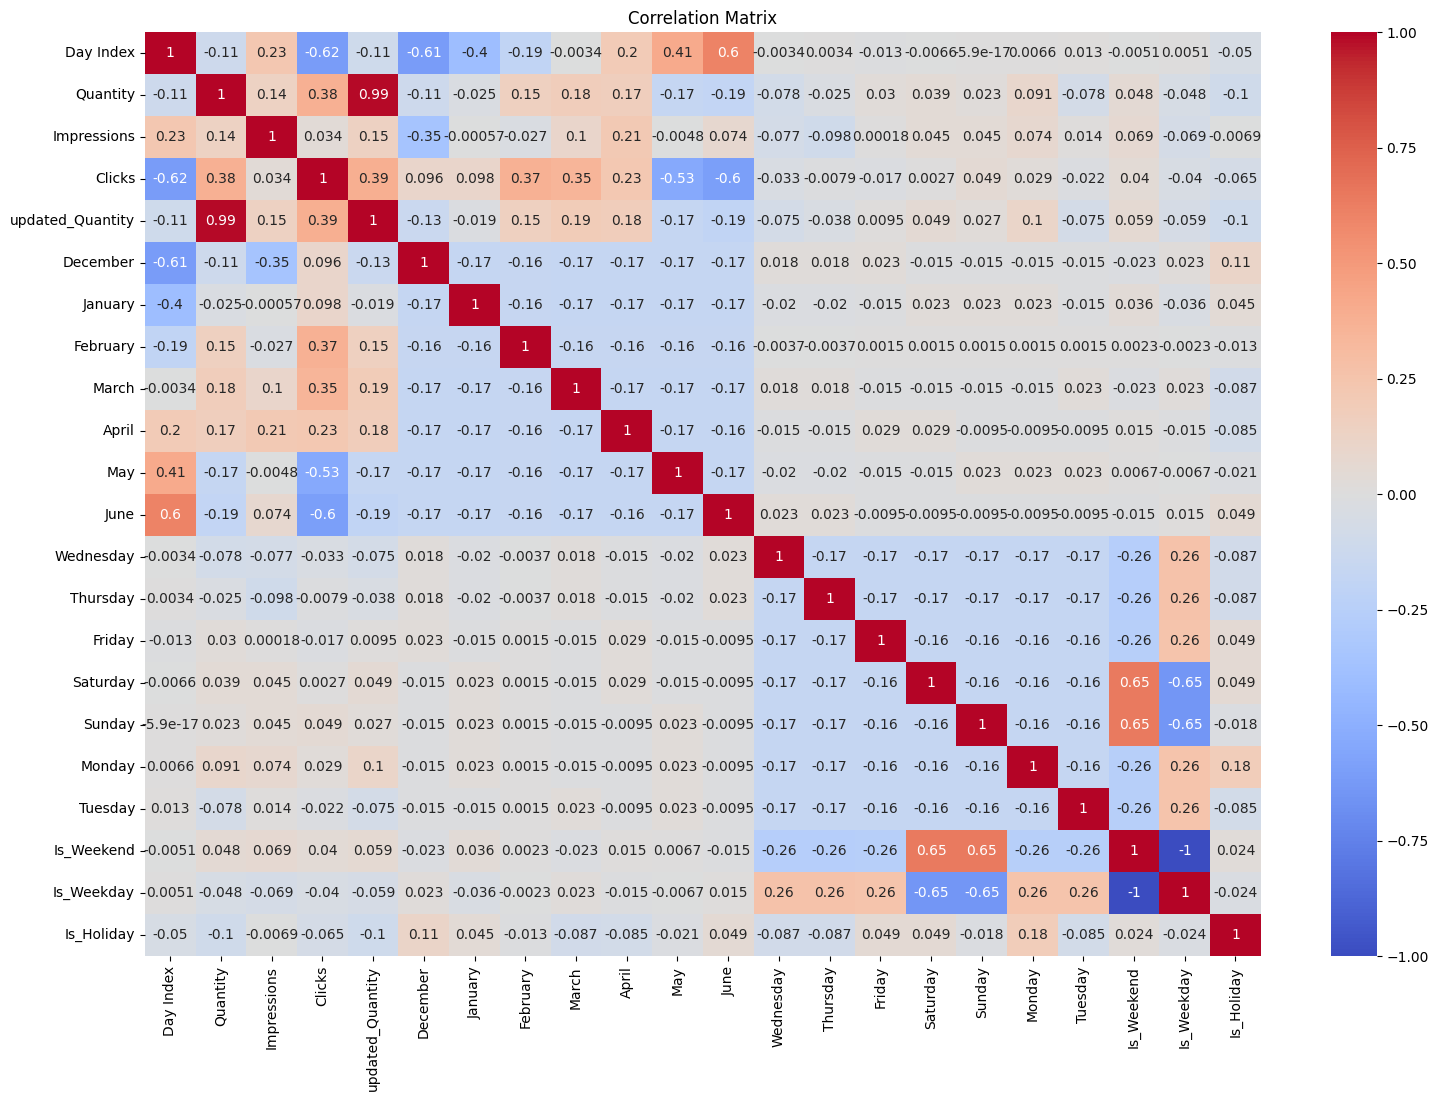

In [24]:
#import seaborn as sns
df_filtered = df.drop(columns=['YearMonth', 'Day of the Month', 'day_of_week','month'])

df_encoded = pd.get_dummies(df_filtered, drop_first=True)

plt.figure(figsize=(18,12))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Final Master Data Plot**

Day wise plot

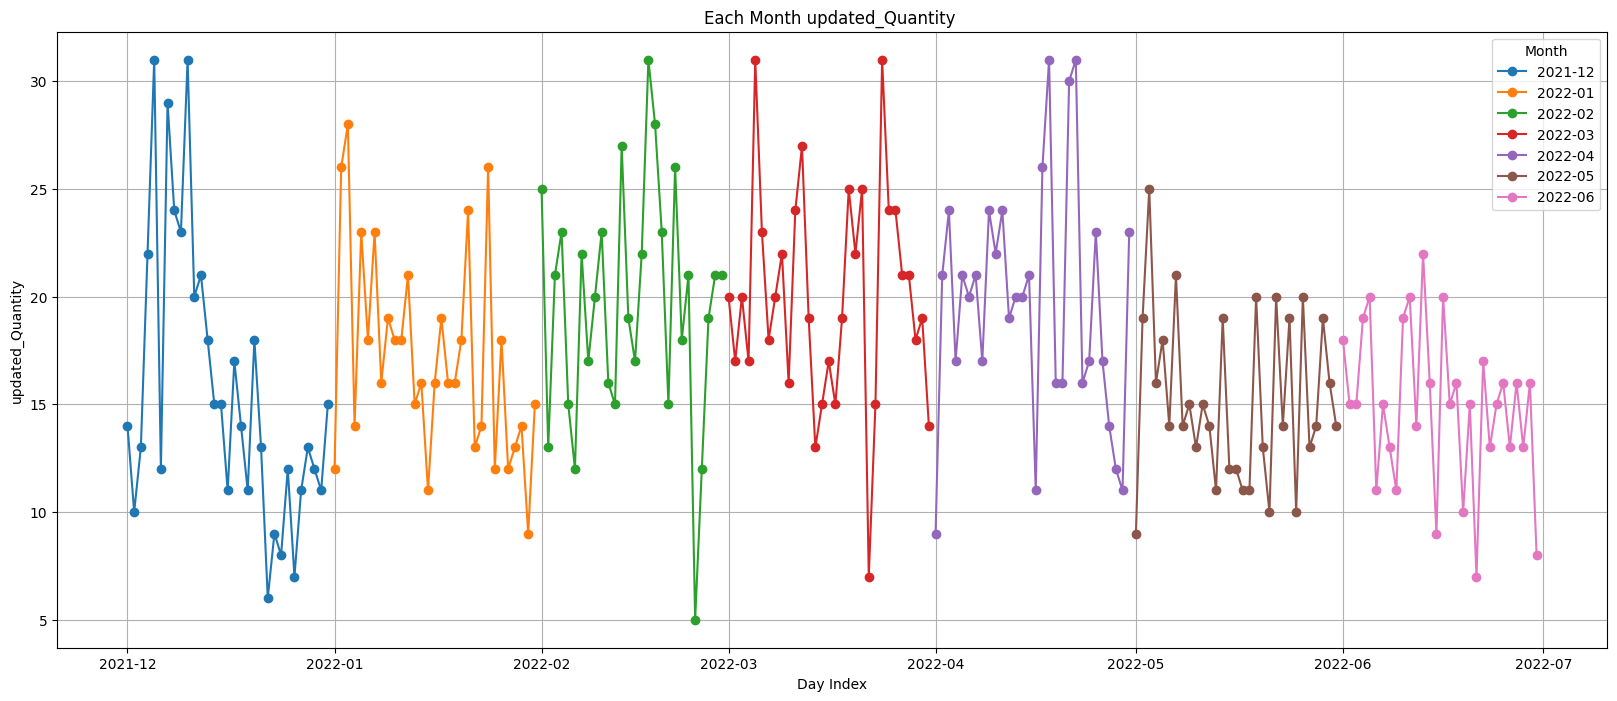

In [36]:
plt.figure(figsize=(20, 8))

for month in df['YearMonth'].unique():
    monthly_data = df[df['YearMonth'] == month]
    plt.plot(monthly_data['Day Index'], monthly_data['updated_Quantity'], marker='o', linestyle='-', label=str(month))

plt.title('Each Month updated_Quantity ')
plt.xlabel('Day Index')
plt.ylabel('updated_Quantity')
plt.legend(title='Month', loc='best')
plt.grid(True)

plt.show()

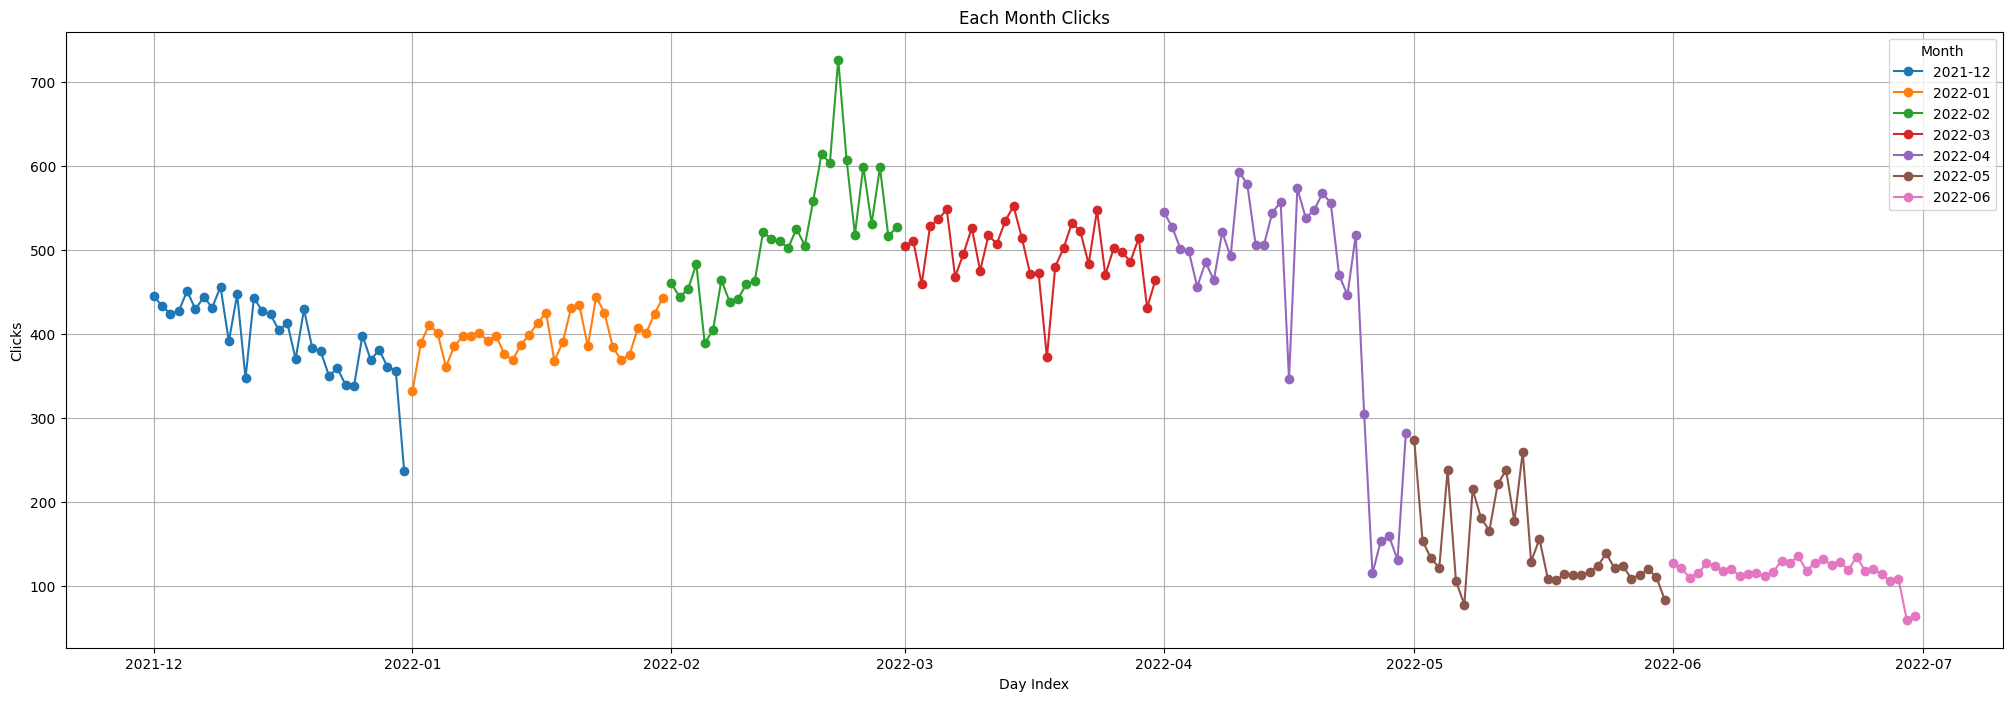

In [26]:
plt.figure(figsize=(25, 8))

for month in df['YearMonth'].unique():
    monthly_data = df[df['YearMonth'] == month]
    plt.plot(monthly_data['Day Index'], monthly_data['Clicks'], marker='o', linestyle='-', label=str(month))

plt.title('Each Month Clicks')
plt.xlabel('Day Index')
plt.ylabel('Clicks')
plt.legend(title='Month', loc='best')
plt.grid(True)

plt.show()

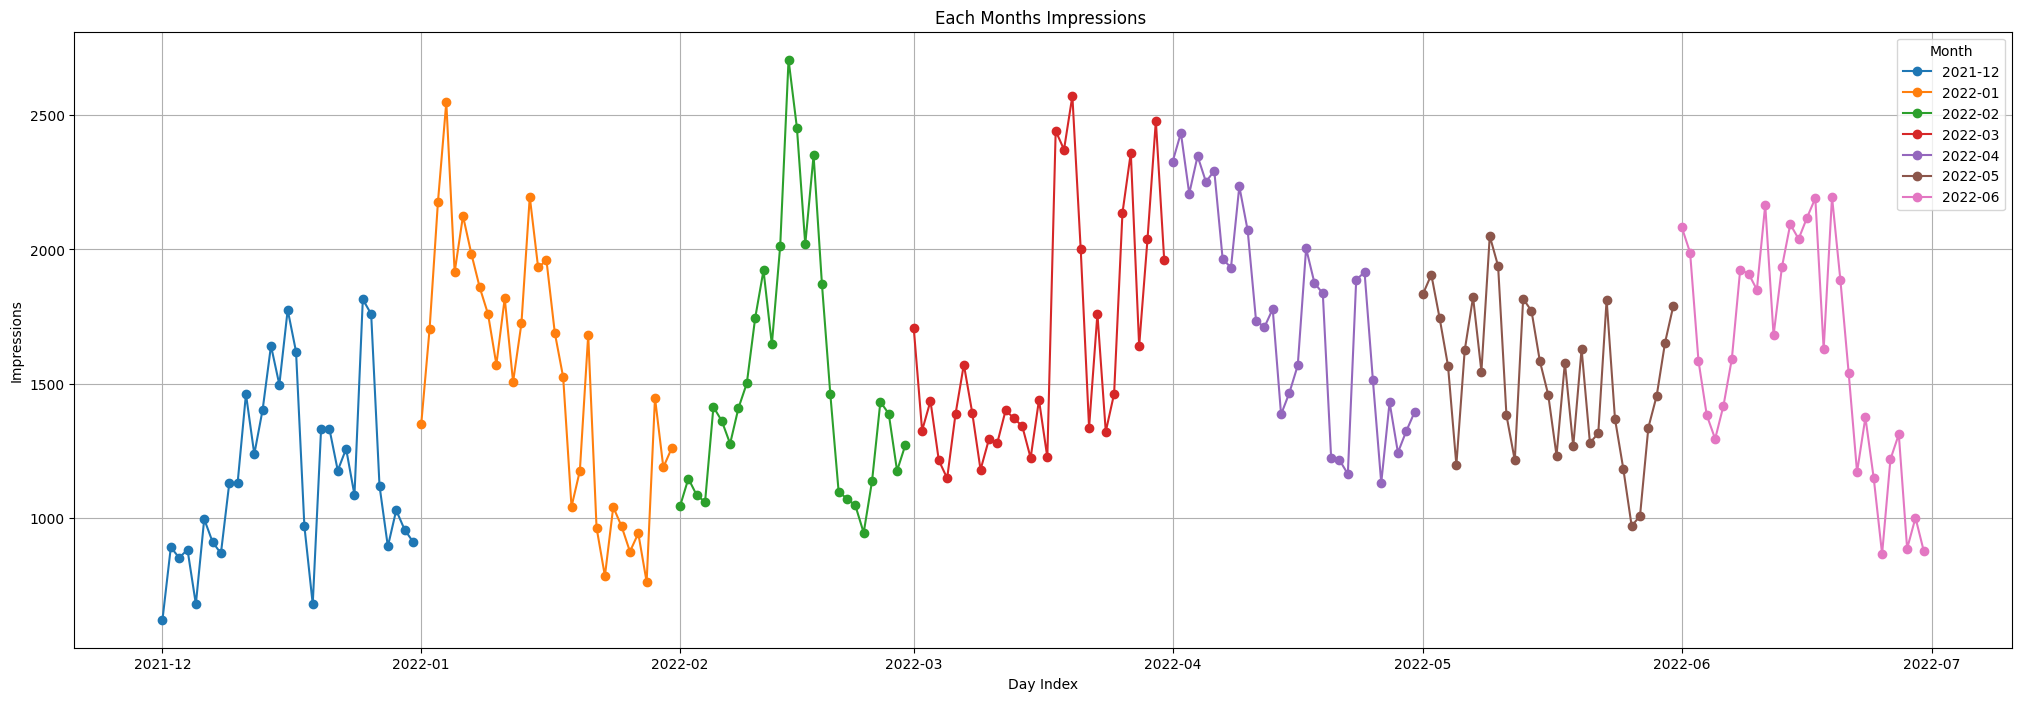

In [27]:
plt.figure(figsize=(25, 8))

for month in df['YearMonth'].unique():
    monthly_data = df[df['YearMonth'] == month]
    plt.plot(monthly_data['Day Index'], monthly_data['Impressions'], marker='o', linestyle='-', label=str(month))

plt.title('Each Months Impressions ')
plt.xlabel('Day Index')
plt.ylabel('Impressions')
plt.legend(title='Month', loc='best')
plt.grid(True)

plt.show()

**Monthly** **plots**

<ipython-input-37-c7741c216f92>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(monthly_quantity))


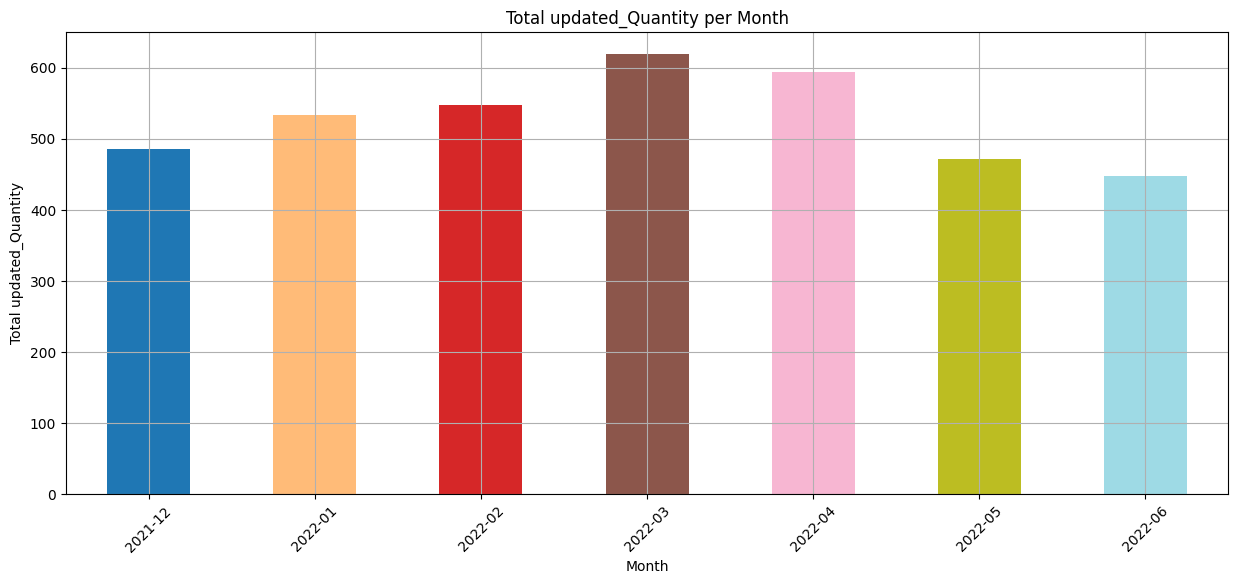

In [37]:
monthly_quantity = df.groupby('YearMonth')['updated_Quantity'].sum()

colors = plt.cm.get_cmap('tab20', len(monthly_quantity))

plt.figure(figsize=(15, 6))
monthly_quantity.plot(kind='bar', color=colors(range(len(monthly_quantity))))

plt.title('Total updated_Quantity per Month')
plt.xlabel('Month')
plt.ylabel('Total updated_Quantity')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


Month wise plot

<ipython-input-29-91424e0dd622>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(monthly_clicks))


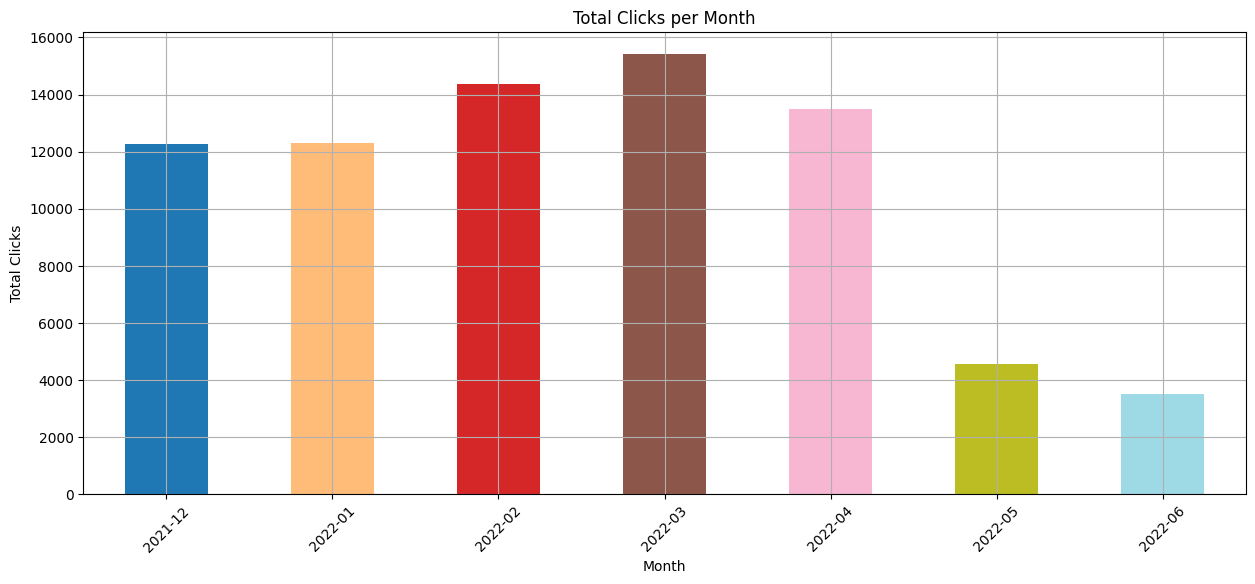

In [29]:
monthly_clicks = df.groupby('YearMonth')['Clicks'].sum()

colors = plt.cm.get_cmap('tab20', len(monthly_clicks))

plt.figure(figsize=(15, 6))
monthly_clicks.plot(kind='bar', color=colors(range(len(monthly_clicks))))

plt.title('Total Clicks per Month')
plt.xlabel('Month')
plt.ylabel('Total Clicks')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


<ipython-input-30-3efb249794c0>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(monthly_impressions))


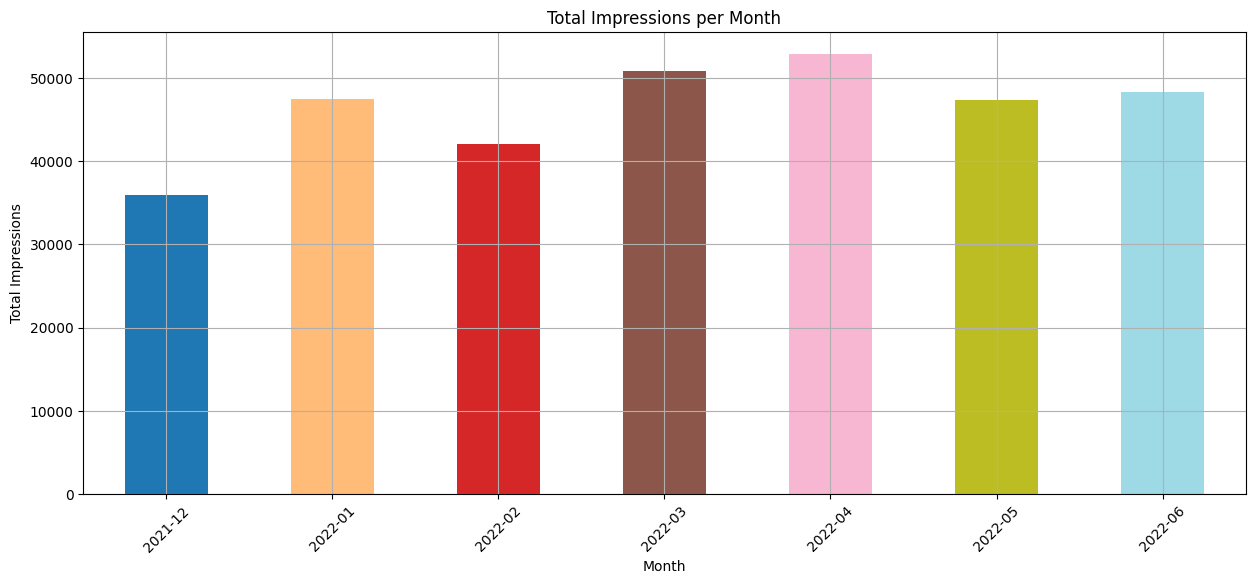

In [30]:
monthly_impressions = df.groupby('YearMonth')['Impressions'].sum()

colors = plt.cm.get_cmap('tab20', len(monthly_impressions))

plt.figure(figsize=(15, 6))
monthly_impressions.plot(kind='bar', color=colors(range(len(monthly_impressions))))

plt.title('Total Impressions per Month')
plt.xlabel('Month')
plt.ylabel('Total Impressions')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


Day of the Week Distribution Ploting

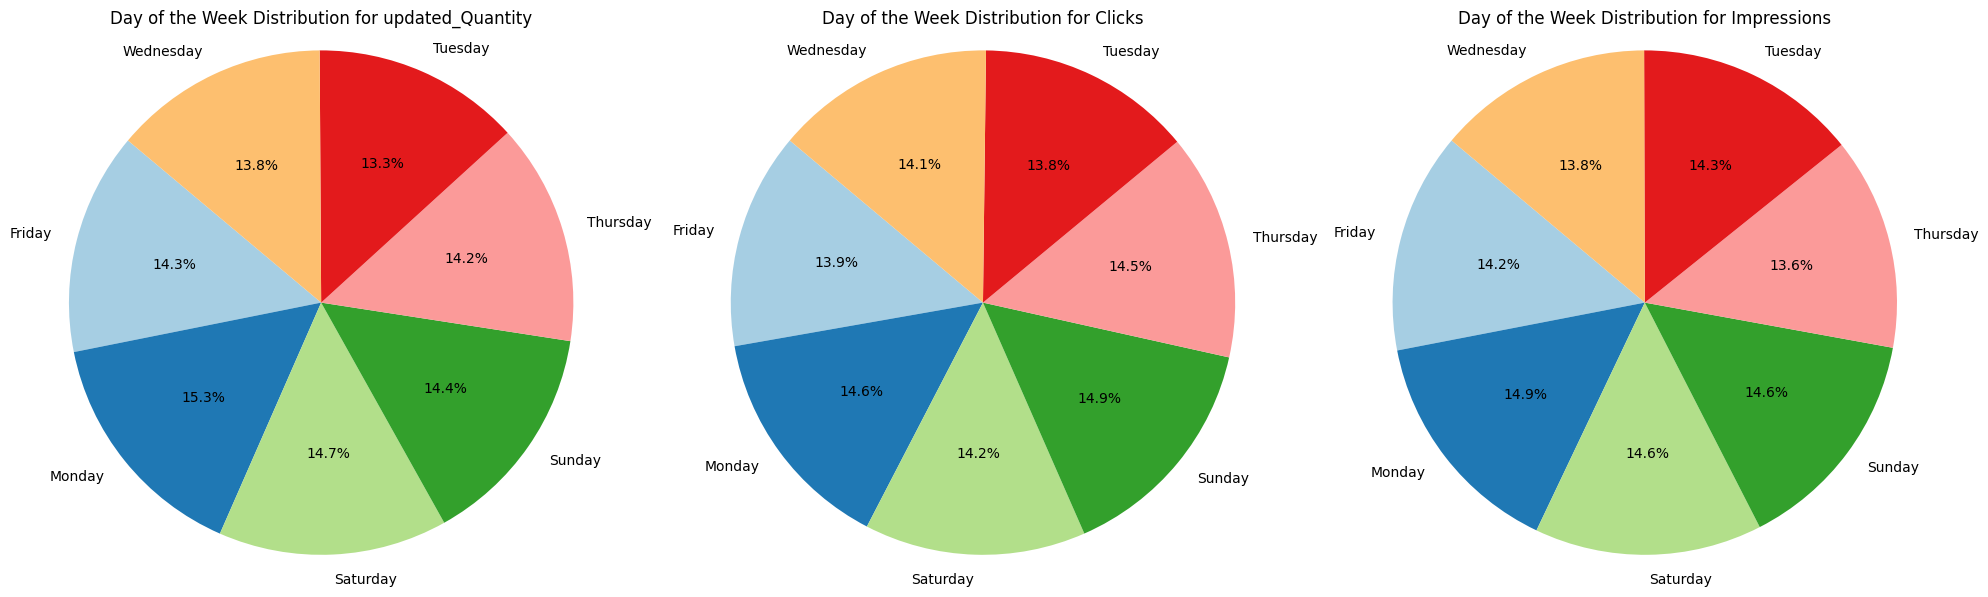

In [38]:
df['DayOfWeek'] = df['Day Index'].apply(lambda x: pd.to_datetime(x).strftime('%A'))

# Function to plot pie chart for Day of the Week distribution
def plot_daywise_pie(df, x_col, y_col, title, ax):
    df1 = df.groupby(x_col)[y_col].sum().reset_index()

    sizes = df1[y_col]
    labels = df1[x_col]

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    ax.set_title(title)
    ax.axis('equal')

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Pie chart for updated_Quantity
plot_daywise_pie(df, 'DayOfWeek', 'updated_Quantity', 'Day of the Week Distribution for updated_Quantity', axes[0])

# Pie chart for Clicks
plot_daywise_pie(df, 'DayOfWeek', 'Clicks', 'Day of the Week Distribution for Clicks', axes[1])

# Pie chart for Impressions
plot_daywise_pie(df, 'DayOfWeek', 'Impressions', 'Day of the Week Distribution for Impressions', axes[2])

plt.tight_layout()
plt.show()


Average Quantity ploting Weekdays vs. Weekends

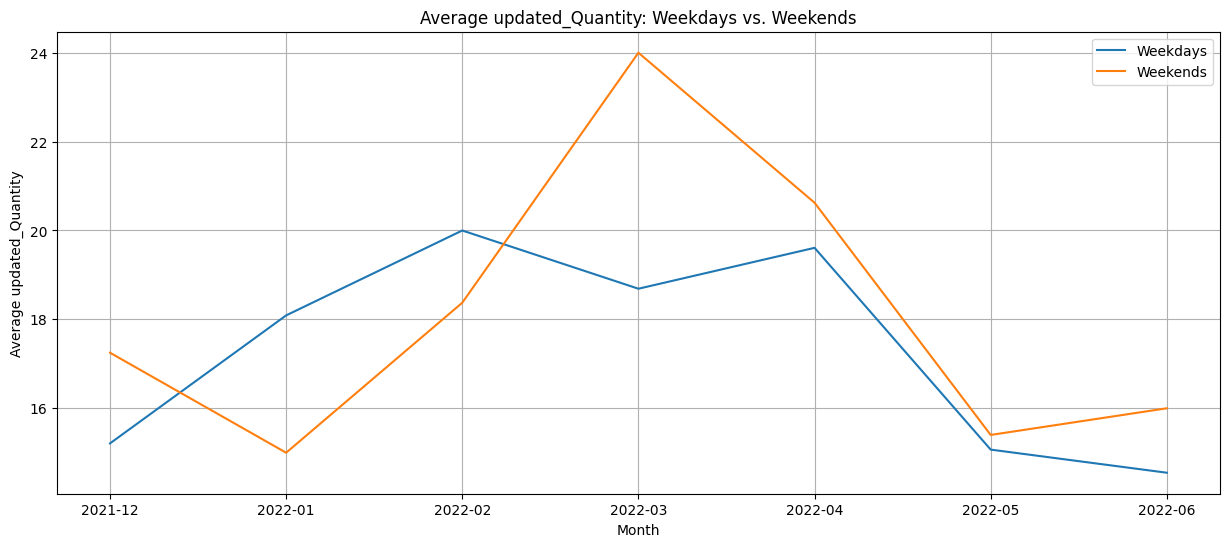

In [39]:
weekday_avg = df[df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])].groupby(['YearMonth', 'day_of_week'])['updated_Quantity'].mean().unstack()
weekend_avg = df[df['day_of_week'].isin(['Saturday', 'Sunday'])].groupby(['YearMonth', 'day_of_week'])['updated_Quantity'].mean().unstack()

# Calculate the average updated_Quantity for weekdays and weekends across all months
weekday_avg_overall = weekday_avg.mean(axis=1)
weekend_avg_overall = weekend_avg.mean(axis=1)

plt.figure(figsize=(15, 6))
plt.plot(weekday_avg_overall.index, weekday_avg_overall.values, label='Weekdays')
plt.plot(weekend_avg_overall.index, weekend_avg_overall.values, label='Weekends')

plt.title('Average updated_Quantity: Weekdays vs. Weekends')
plt.xlabel('Month')
plt.ylabel('Average updated_Quantity')
plt.legend()
plt.grid(True)
plt.show()